# Module 5 Assessment 

Welcome to your Module 5 Assessment. You will be tested for your understanding of concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. 

**_Read the instructions very carefully!_** You will be asked both to write code and respond to a few short answer questions.  

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts and how to apply different methods is more important than getting the best model.

You will have up to 120 minutes to complete this assessment.

The sections of the assessment are:

- Decision Trees
- Ensemble Models 
- PCA
- Clustering

**Note on the short answer questions**: 
> Please use your own words, even if you consult another source to help you craft your response. Short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, but do your best to communicate your answers clearly!


## Decision Trees

### Concepts 
You're given a dataset of 30 elements, 15 of which belong to a positive class (denoted by **+**) and 15 of which do not (denoted by **-**). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows the class distribution of elements obtained when splitting the data by attribute A, and the diagram of the right hand side shows the class distribution of elements obtained when splitting the data by attribute B. 

<img src="images/decision_stump.png">

**1.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node?** _(Hint: Mention splitting criteria)_

In [ ]:
# # Your answer here 

# Attribute A resulted in the best split. It provided the most distinct groups and resulted in the highest information gain. 
# Choosing the best attribute to split on depends on your splitting criteria.

### Decision Trees for Regression 

In this section, you will use decision trees to fit a regression model to the Combined Cycle Power Plant dataset. 

This dataset is from the UCI ML Dataset Repository, and has been included in the `data` folder of this repository as an Excel `.xlsx` file, `Folds5x2_pp.xlsx`. 

The features of this dataset consist of hourly average ambient variables taken from various sensors located around a power plant that record the ambient variables every second.  
- Temperature (AT) 
- Ambient Pressure (AP) 
- Relative Humidity (RH)
- Exhaust Vacuum (V) 

The target to predict is the net hourly electrical energy output (PE). 

The features and target variables are not normalized.

In the cells below, we import `pandas` and `numpy` for you, and we load the data into a pandas DataFrame. We also include code to inspect the first five rows and get the shape of the DataFrame.

In [1]:
import pandas as pd 
import numpy as np 

# Load the data
filename = 'data/Folds5x2_pp.xlsx'
df = pd.read_excel(filename)

In [2]:
# Inspect the first five rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Get the shape of the dataframe 
df.shape

(9568, 5)

Before fitting any models, you need to create training and testing splits for the data.

Below, we split the data into features and target ('PE') for you. 

In [4]:
X = df[df.columns.difference(['PE'])]
y = df['PE']

**1.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=0.1`.** 

In [8]:
# Your code here. Replace None with appropriate code. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

**1.3) Fit a vanilla decision tree regression model with scikit-learn to the training data.** Set `random_state = 1` for reproducibility. **Evaluate the model on the test data.** 

In [13]:
# Your code here 
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state = 1)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)



**1.4) Obtain the mean squared error, mean absolute error, and coefficient of determination (r2 score) of the predictions on the test set.** _Hint: Look at the `sklearn.metrics` module._

In [16]:
# Your code here. Replace None with appropriate code. 

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print("Mean Squared Error:", mse(y_test, y_pred))
print("Mean Absolute Error:", mae(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 21.425475000000006
Mean Absolute Error: 3.0664799331103687
R-squared: 0.9267661950706985


### Hyperparameter Tuning of Decision Trees for Regression

Next, you'll find the optimal `max_depth`, `min_samples_leaf`, and `min_samples_split` hyperparameters for a decision tree regression model. You'll use the same data as in the previous question.

In the cell below, we have provided you with a function, `evaluate_performance_with_different_hyperparameters`. 

In [22]:
def evaluate_performance_with_different_hyperparameters(hyperparameter_name, hyperparameter_values):
    
    mses_test = []
    
    for value in hyperparameter_values:
        if hyperparameter_name == 'max_depth':
            dt = DecisionTreeRegressor(max_depth=value, random_state=1)
        elif hyperparameter_name == 'min_samples_split':
            dt = DecisionTreeRegressor(min_samples_split=value, random_state=1)
        else:
            dt = DecisionTreeRegressor(min_samples_leaf=value, random_state=1)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        mse_test = mse(y_test, y_pred)
        mses_test.append(mse_test)
        
    return mses_test

This function loops through all possible hyperparameter values in the array `hyperparameter_values`, fits a model with each one of hyperparameter values using the training dataset, and evaluates the trained model performance on the test data. It uses the mean squared error metric to evaluate model performance. 
* Note that you only need to pass the hyperparameter name as a string and a list of hyperparameter values to this function to obtain a list of mean squared error scores for each of the models trained using the different hyperparameter values. 

After you have obtained model performance on test data, you will select the best `max_depth`, `min_samples_leaf`, and `min_samples_split`, train a new model using the best of these hyperparameters, and evaluate model performance. 

In the cell below, we create three variables for you, one for each hyperparameter you'll tune, that contain the hyperparameter values we want to train our models with. 

In [23]:
# max_depth
max_depths = np.arange(1, 21)

# min_samples_split
min_samples_splits = np.arange(5, 100, 5)

# min_samples_leaf
min_samples_leafs = np.arange(5, 100, 5)

Next, you'll obtain model performance on the test dataset for models fit to the training data using the different hyperparameters.

**1.5) Create three variables, one for each hyperparameter you'll tune, that contain a list of the mean squared errors obtained by evaluating the trained models on the test data as hyperparameter values are changed.** 

_Hint: Set these variables equal to the result of the function call, for the hyperparameters `max_depth`, `min_samples_split`, `min_samples_leaf` respectively._

In [24]:
# Replace None with appropriate code

mses_test_depths = evaluate_performance_with_different_hyperparameters('max_depth', max_depths)
mses_test_splits =  evaluate_performance_with_different_hyperparameters('min_samples_split', min_samples_splits)
mses_test_leafs =  evaluate_performance_with_different_hyperparameters('min_samples_leafs', min_samples_leafs)

Now that you have evaluated model performance using different hyperparameters, you will select the best hyperparameter to use and train a new model using these hyperparameters.

We have provided you with a function `get_best_param` in the cell below so you can get the best hyperparameter of interest given a list of mean squared errors and a list of hyperparameter values. 

In [26]:
def get_best_param(mse_scores, hyperparameter_values):
    # get index of minimum mse scores 
    ix = np.argmin(mse_scores)
    return hyperparameter_values[ix]

**1.6) Find the best hyperparameters and print them out.** 
* Place the best `max_depth` in a variable called `best_max_depth`.
* Place the best `min_samples_split` in a variable called `best_min_samples_split`.
* Place the best `min_samples_leaf` in a variable called `best_min_samples_leaf`.

In [27]:
# Replace None with appropriate code

best_max_depth = get_best_param(mses_test_depths, max_depths)
best_min_samples_split = get_best_param(mses_test_splits, min_samples_splits)
best_min_samples_leaf = get_best_param(mses_test_leafs, min_samples_leafs)

print("The best max_depth found is:", best_max_depth)
print("The best min_samples_split found is:", best_min_samples_split)
print("The best min_samples_leaf found is:", best_min_samples_leaf)

The best max_depth found is: 8
The best min_samples_split found is: 40
The best min_samples_leaf found is: 10


**1.7) Use the optimal hyperparameters to fit a decision tree regression model to the training data.** Call the model `dt_tuned`.  Use `random_state = 1` for reproducibility.

In [32]:
# Replace None with appropriate code 

dt_tuned = DecisionTreeRegressor(max_depth = best_max_depth, 
                                 min_samples_split = best_min_samples_split, 
                                 min_samples_leaf = best_min_samples_leaf,
                                 random_state=1)

dt_tuned.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

**1.8) Evaluate the model's performance (mean squared error, mean absolute error, and coefficient of determination) on the test data. Did tuning the model hyperparameters improve model performance on the test dataset compared to the vanilla decision tree you trained?** 

In [39]:
# Replace None with appropriate code 

y_pred_tuned = dt_tuned.predict(X_test)
print("Tuned Model")
print("Mean Squared Error:", mse(y_test, y_pred_tuned))
print("Mean Absolute Error:", mae(y_test, y_pred_tuned))
print("R-squared:", r2_score(y_test, y_pred_tuned))
print("---------------------------------------")
print("Vanilla Model")
print("Mean Squared Error:", mse(y_test, y_pred))
print("Mean Absolute Error:", mae(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Tuned Model
Mean Squared Error: 16.857525199369277
Mean Absolute Error: 3.041810727866444
R-squared: 0.9423797739820754
---------------------------------------
Vanilla Model
Mean Squared Error: 21.425475000000006
Mean Absolute Error: 3.0664799331103687
R-squared: 0.9267661950706985


In [ ]:
# Your answer here
Yes,tuning the model improved performace of the mse and slightly improved the r2.

## Ensemble Methods

### Introduction to Ensemble Methods

**2.1) Explain how the random forest algorithm works. Why are random forests resilient to overfitting?**

_Hint: Your answer should discuss bagging and the subspace sampling method._

 Your answer here

Random forest uses a technique called bagging and subspace sampling in which is takes many subsamples of the dataset with replacement and performs several decision trees on the data. Once completed, the results from those decision trees are used to make the final prediciton. This technique is resillient to overfitting because the alorithm is run on several different versions of the dataset rather than just one.

### Random Forests and Hyperparameter Tuning using GridSearchCV

In this section, you will perform hyperparameter tuning for a Random Forest classifier using GridSearchCV. You will use `scikit-learn`'s wine dataset to classify wines into one of three different classes. 

After finding the best estimator, you will interpret the best model's feature importances. 

In the cells below, we have loaded the relevant imports and the wine data for you. 

In [40]:
# Relevant imports 
from sklearn.datasets import load_wine

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)

In the cells below, we inspect the first five rows of the dataframe and compute the dataframe's shape.

In [41]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [42]:
df.shape

(178, 14)

We also get descriptive statistics for the dataset features, and obtain the distribution of classes in the dataset. 

In [43]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
y.value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

You will now perform hyper-parameter tuning for a Random Forest classifier.

**2.2) Use the following parameters to construct the `param_grid` dictionary to pass to `GridSearchCV` when instantiating the object.** 

* `n_estimators`: 5, 10, 20, and 30
* `max_features`: 'auto', 'sqrt', 'log2'
* `max_depth`: 4, 5, and 6
* `criterion`: 'gini' and 'entropy' 

In [47]:
# Replace None with relevant code 
param_grid = {'n_estimators': [5, 10, 20, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4, 5, 6],
              'criterion': ['gini','entropy']}

Now that you have created the `param_grid` dictionary of hyperparameters, let's continue performing hyperparameter optimization of a Random Forest Classifier. 

In the cell below, we include the relevant imports for you.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**2.3) Create an instance of a Random Forest classifier estimator; call it `rfc`.** Make sure to set `random_state=42` for reproducibility. 

In [50]:
# Replace None with appropriate code
rfc = RandomForestClassifier()

**2.4) Create an instance of an `GridSearchCV` object and fit it to the data.** Call the instance `cv_rfc`. 

* Use the random forest classification estimator you instantiated in the cell above, the parameter grid dictionary constructed, and make sure to perform 5-fold cross validation. 
* The fitting process should take 10 - 15 seconds to complete. 

In [51]:
# Replace None with appropriate code 
cv_rfc = GridSearchCV(rfc, param_grid, 
                           cv= 5,
                           return_train_score=True)

cv_rfc.fit(X, y)

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

**2.5) What are the best training parameters found by GridSearchCV?** 

_Hint: Explore the documentation for GridSearchCV._ 

In [52]:
# Replace None with appropriate code 
cv_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 5}

In the cell below, we create a variable `best_model` that holds the best model found by the grid search.

In [53]:
best_model = cv_rfc.best_estimator_

Next, we give you a function that creates a horizontal bar plot to visualize the feature importances of a model, sorted in descending order. 

In [54]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    
    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances, 
                                     key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')

**2.6) Create a plot of the best model's feature importances. What are this model's top 3 features in order of descending importance?** 

_Hint: To create the plot, pass the appropriate parameters to the function above._

In [62]:
rfc = RandomForestClassifier(criterion = 'entropy',
                             max_depth = 6,
                             max_features = 'auto',
                             n_estimators = 5)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

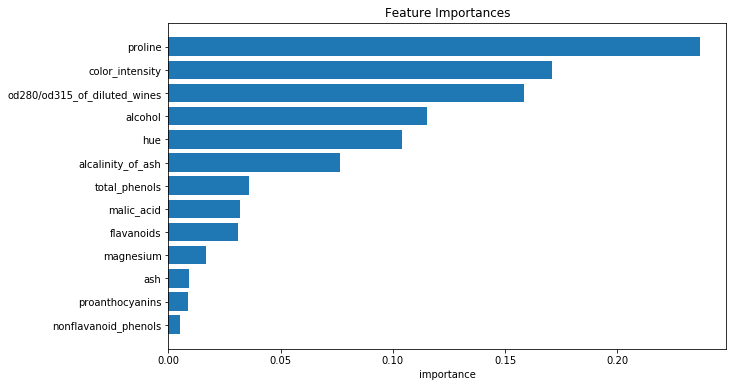

In [63]:
create_plot_of_feature_importances(rfc, X)

## Principal Components Analysis

### Training a model with PCA-extracted features

In this section, you'll apply the unsupervised learning technique of Principal Components Analysis to the wine dataset. 

You'll use the principal components of the dataset as features in a machine learning model. You'll use the extracted features to train a vanilla Random Forest Classifier, and compare model performance to a model trained without PCA-extracted features. 

In the cell below, we import the data for you, and we split the data into training and test sets. 

In [64]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

wine = load_wine()
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'class'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3.1) Fit PCA to the training data.** 

Call the PCA instance you'll create `wine_pca`. Set `n_components=0.9` and make sure to use `random_state = 42`.

_Hint: Make sure to include necessary imports for preprocessing the data!_

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components = .9, random_state = 42)
wine_pca = pca.fit_transform(X)

**3.2) What is the meaning of setting `n_components` to 0.9?** 

_Hint: Look at the documentation for `PCA` in scikit-learn._

In [67]:
#Means keep 90% of the features

**3.3) How many principal components are there in the fitted PCA object?**

_Hint: Look at the list of attributes of trained `PCA` objects in the scikit-learn documentation_

In [78]:
# Replace None with appropriate code 
print(pca.components_)

#13


[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]]


178

Next, you'll reduce the dimensionality of the training data to the number of components that explain at least 90% of the variance in the data, and then you'll use this transformed data to fit a Random Forest classification model. 

You'll compare the performance of the model trained on the PCA-extracted features to the performance of a model trained using all features without feature extraction.

**3.4) Transform the training features into an array of reduced dimensionality using the `wine_pca` PCA object you've fit in the previous cell.** Call this array `X_train_pca`.

In [80]:
# Replace None with appropriate code  
X_train_pca = pca.fit(X)

Next, we create a dataframe from this array of transformed features and we inspect the first five rows of the dataframe for you. 

In [83]:
# Create a dataframe from this array of transformed features 
X_train_pca = pd.DataFrame(X_train_pca, index = X.index, columns = X.columns)

# Inspect the first five rows of the transformed features dataset 
X_train_pca.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
1,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
2,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
3,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
4,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."


You will now use the PCA-extracted features to train a random forest classification model.

**3.5) Instantiate a vanilla Random Forest Classifier (call it `rfc`) and fit it to the transformed training data.** Set `random_state = 42`. 

In [ ]:
# Replace None with appropriate code 
rfc = None
rfc.fit(None, None)

**3.6) Evaluate model performance on the test data and place model predictions in a variable called `y_pca_pred`.**

_Hint: Make sure to transform the test data the same way as you transformed the training data!!!_

In [ ]:
# Your code here 

In the cell below, we print the classification report for the model performance on the test data. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pca_pred))

Run the cell below to fit a vanilla Random Forest Classifier to the untransformed training data,  evaluate its performance on the untransformed test data, and print the classification report for the model. 

In [ ]:
vanilla_rfc = RandomForestClassifier(random_state=42)
vanilla_rfc.fit(X_train, y_train)

y_pred = vanilla_rfc.predict(X_test)

print(classification_report(y_test, y_pred))

**3.7) Compare model performance. Did the overall accuracy of the model improve when using the transformed features?**

In [ ]:
# Your answer here 

## Clustering 

### Clustering Algorithms: k-means and hierarchical agglomerative clustering

**4.1) Using the gif below for reference, describe the steps of the k-means clustering algorithm. Compare to the way clusters are created using hierarchical agglomerative clustering.** 
* If the gif doesn't run, you may access it via [this link](https://github.com/learn-co-curriculum/dsc-module-5-assessment/blob/master/images/good-centroid-start.gif).

<img src='images/good-centroid-start.gif'>

In [ ]:
# Your answer here

### k-means Clustering

For this question, you will apply k-means clustering to your now friend, the wine dataset. 

You will use scikit-learn to fit k-means clustering models, and you will determine the optimal number of clusters to use by looking at silhouette scores. 

We load the wine dataset for you in the cell below. 

In [ ]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
wine = load_wine()
X = pd.DataFrame(X, columns = wine.feature_names)

**4.2) Write a function called `get_labels` that will find `k` clusters in a dataset of features `X`, and return the labels for each row of `X`.**

_Hint: Within the function, you'll need to:_
* _instantiate a k-means clustering model (use `random_state = 1` for reproducibility),_ 
* _fit the model to the data, and_
* _return the labels for each point._

In [ ]:
# Replace None and pass with appropriate code
def get_labels(k, X):
    
    # Instantiate a k-means clustering model with random_state=1 and n_clusters=k
    kmeans = None
    
    # Fit the model to the data
    None
    
    # return the predicted labels for each row in the data
    pass 

**4.3) Fit the k-means algorithm to the wine data for k values in the range 2 to 9 using the function you've written above. Obtain the silhouette scores for each trained k-means clustering model, and place the values in a list called `silhouette_scores`.** 

We have provided you with some starter code in the cell below.

_Hints: What imports do you need? Do you need to pre-process the data in any way before fitting the k-means clustering algorithm?_ 

In [ ]:
# Your code here

silhouette_scores= []

for k in range(2, 10):
    labels = None 
    
    score = silhouette_score(None, None, metric='euclidean')
    
    silhouette_scores.append(score)

Run the cell below to plot the silhouette scores obtained for each different value of k against k, the number of clusters we asked the algorithm to find. 

In [ ]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

**4.4) Which value of k would you choose based on the plot of silhouette scores? How does this number compare to the number of classes in the wine dataset?**

In [ ]:
# Your answer here 